In [ ]:
import requests
import pandas as pd
from pyjstat import pyjstat

url = "https://data.ssb.no/api/v0/no/table/07459/"

query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "agg:KommSummer",
        "values": [
          "K-5503"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:AlleAldre00B",
        "values": [
          "000",
          "001",
          "002",
          "003",
          "004",
          "005",
          "006",
          "007",
          "008",
          "009",
          "010",
          "011",
          "012",
          "013",
          "014",
          "015",
          "016",
          "017",
          "018",
          "019",
          "020",
          "021",
          "022",
          "023",
          "024",
          "025",
          "026",
          "027",
          "028",
          "029",
          "030",
          "031",
          "032",
          "033",
          "034",
          "035",
          "036",
          "037",
          "038",
          "039",
          "040",
          "041",
          "042",
          "043",
          "044",
          "045",
          "046",
          "047",
          "048",
          "049",
          "050",
          "051",
          "052",
          "053",
          "054",
          "055",
          "056",
          "057",
          "058",
          "059",
          "060",
          "061",
          "062",
          "063",
          "064",
          "065",
          "066",
          "067",
          "068",
          "069",
          "070",
          "071",
          "072",
          "073",
          "074",
          "075",
          "076",
          "077",
          "078",
          "079",
          "080",
          "081",
          "082",
          "083",
          "084",
          "085",
          "086",
          "087",
          "088",
          "089",
          "090",
          "091",
          "092",
          "093",
          "094",
          "095",
          "096",
          "097",
          "098",
          "099",
          "100",
          "101",
          "102",
          "103",
          "104",
          "105+"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2025"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

response = requests.post(url, json=query)

if response.status_code == 200:
    dataset = pyjstat.Dataset.read(response.text)
    df = dataset.write('dataframe')
    print(df.head())
else:
    print(f"Feil ved henting av data: {response.status_code}")

               region alder statistikkvariabel    år  value
0  Harstad - Hárstták  0 år           Personer  2025    211
1  Harstad - Hárstták  1 år           Personer  2025    237
2  Harstad - Hárstták  2 år           Personer  2025    244
3  Harstad - Hárstták  3 år           Personer  2025    247
4  Harstad - Hárstták  4 år           Personer  2025    252


_______Oppgave 1 befolkning_______

In [ ]:
def alder_til_tall(a):
    if "+" in a:
        return 105
    else:
        return int(a.split()[0])

df["alder_tall"] = df["alder"].apply(alder_til_tall)

df["aldergruppe"] = pd.cut(
    df["alder_tall"],
    bins=[-1,9,19,29,39,49,59,69,79,89,99,109],
    labels=["0-9","10-19","20-29","30-39","40-49","50-59",
            "60-69","70-79","80-89","90-99","100+"]
)

gruppe_df = df.groupby("aldergruppe")["value"].sum().reset_index()

print(gruppe_df)

   aldergruppe  value
0          0-9   2452
1        10-19   2909
2        20-29   2948
3        30-39   3387
4        40-49   3020
5        50-59   3320
6        60-69   3015
7        70-79   2674
8        80-89   1211
9        90-99    228
10        100+      3


/var/folders/st/cq8tz_g925vcbqry4ct_60kc0000gn/T/ipykernel_20902/3627795375.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gruppe_df = df.groupby("aldergruppe")["value"].sum().reset_index()


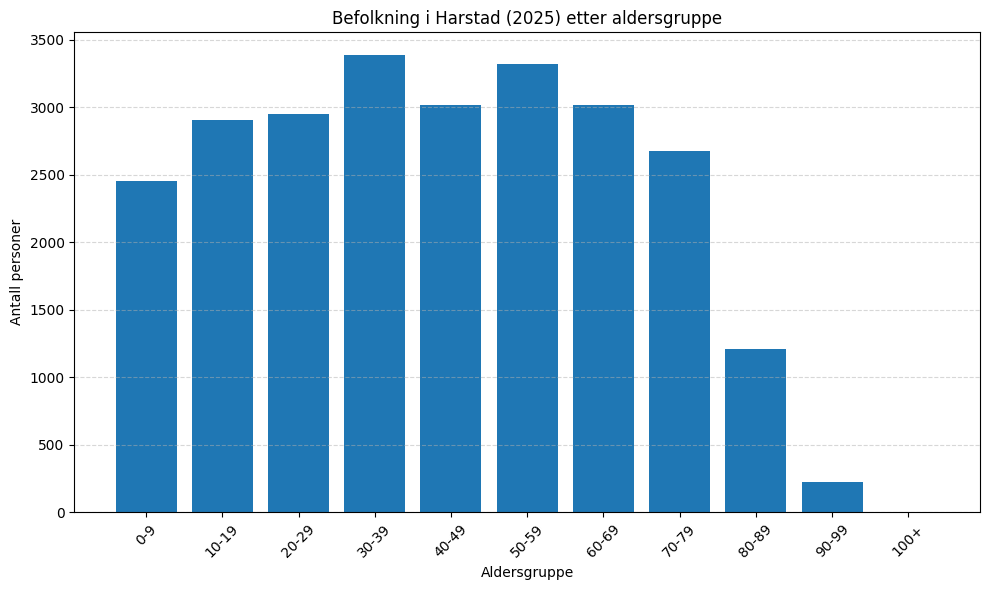

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(gruppe_df["aldergruppe"], gruppe_df["value"])
plt.title("Befolkning i Harstad (2025) etter aldersgruppe")
plt.xlabel("Aldersgruppe")
plt.ylabel("Antall personer")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


________Oppgabave 2 innvandring________

In [ ]:
#Oppg 2
import pandas as pd

file_path = "/Users/paulindset/Desktop/Datavitenskap/personer-med-innvandrerb.csv"
df_innvandrer = pd.read_csv(file_path, delimiter=";")

df_innvandrer.head()

,Land,2025
0,Sverige,84
1,Litauen,56
2,Polen,291
3,Tyskland,96
4,Ukraina,428


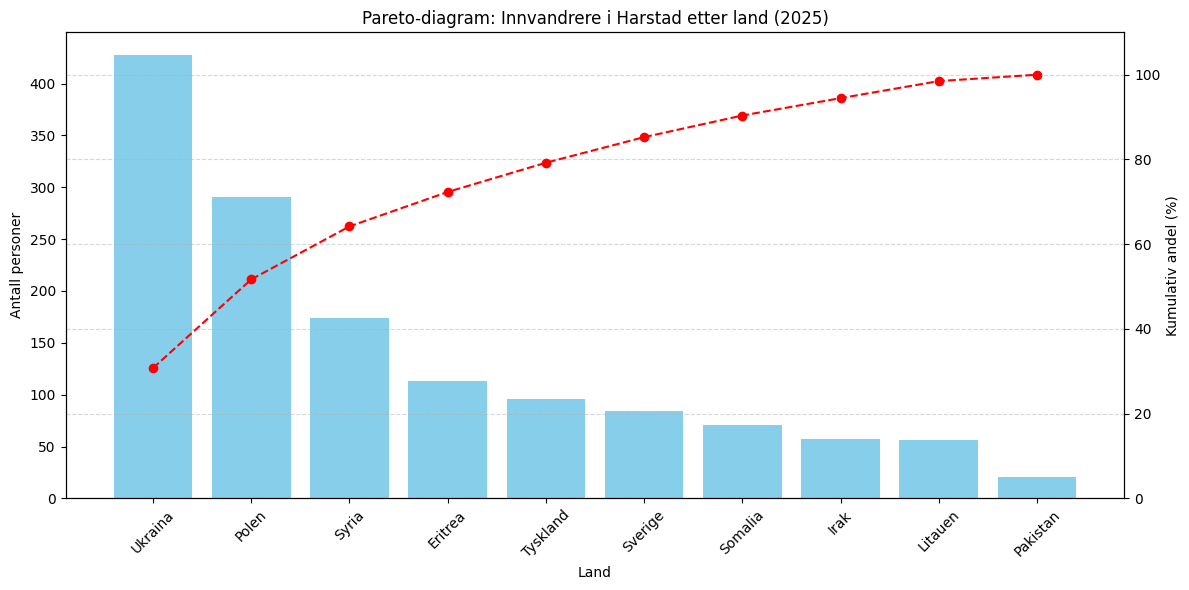

In [ ]:
import matplotlib.pyplot as plt

df_sorted = df_innvandrer.sort_values(by="2025", ascending=False)
df_sorted["kumulativ_andel"] = df_sorted["2025"].cumsum() / df_sorted["2025"].sum() * 100

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(df_sorted["Land"], df_sorted["2025"], color="skyblue")
ax1.set_ylabel("Antall personer")
ax1.set_xlabel("Land")
ax1.tick_params(axis='x', rotation=45)
ax2 = ax1.twinx()
ax2.plot(df_sorted["Land"], df_sorted["kumulativ_andel"], color="red", marker="o", linestyle="dashed")
ax2.set_ylabel("Kumulativ andel (%)")
ax2.set_ylim(0, 110)

plt.title("Pareto-diagram: Innvandrere i Harstad etter land (2025)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


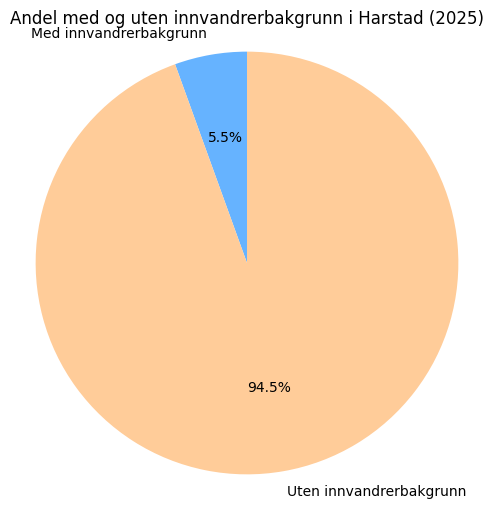

In [ ]:
total_befolkning = 2452 + 2909 + 2948 + 3387 + 3020 + 3320 + 3015 + 2674 + 1211 + 228 + 3  # = 27267

med_innvandrer = df_innvandrer["2025"].sum()
uten_innvandrer = total_befolkning - med_innvandrer

labels = ["Med innvandrerbakgrunn", "Uten innvandrerbakgrunn"]
sizes = [med_innvandrer, uten_innvandrer]
colors = ["#66b3ff", "#ffcc99"]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct="%.1f%%", startangle=90)
plt.title("Andel med og uten innvandrerbakgrunn i Harstad (2025)")
plt.axis("equal")
plt.show()

_______Oppgave 3 Jobbnæringen_______

In [ ]:
file_path_c = "/Users/paulindset/Desktop/Datavitenskap/hva-innbyggerne-jobber-m.csv"
df_jobb = pd.read_csv(file_path_c, delimiter=";")

df_jobb.head()

,Næring,2020
0,"Jordbruk, skogbruk og fiske",261
1,Sekundærnæringer,2112
2,"Varehandel, hotell og restaurant, samferdsel, ...",3995
3,"Off.adm., forsvar, sosialforsikring",1132
4,Undervisning,1001


In [ ]:
arbeidsfør_alder = gruppe_df.loc[gruppe_df["aldergruppe"].isin(["20-29", "30-39", "40-49", "50-59", "60-69"]), "value"].sum()
print(f"Innbyggere i arbeidsfør alder (20–69): {arbeidsfør_alder}")

Innbyggere i arbeidsfør alder (20–69): 15690


In [ ]:
sysselsatte = df_jobb["2020"].sum()
print(f"Totalt antall sysselsatte: {sysselsatte}")

Totalt antall sysselsatte: 12158


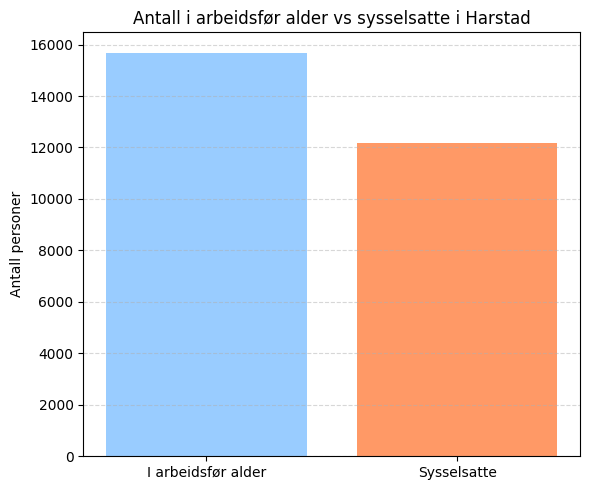

Andel utenfor arbeidslivet (estimert): 22.5%


In [ ]:
utenfor = arbeidsfør_alder - sysselsatte
andel_utenfor = utenfor / arbeidsfør_alder * 100

plt.figure(figsize=(6,5))
plt.bar(["I arbeidsfør alder", "Sysselsatte"], [arbeidsfør_alder, sysselsatte], color=["#99ccff", "#ff9966"])
plt.title("Antall i arbeidsfør alder vs sysselsatte i Harstad")
plt.ylabel("Antall personer")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

print(f"Andel utenfor arbeidslivet (estimert): {andel_utenfor:.1f}%")

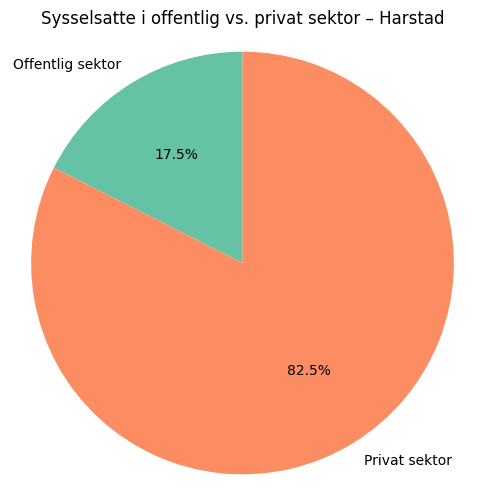

In [ ]:
offentlig_navn = [
    "Undervisning",
    "Helse og sosialtjenester",
    "Off.adm., forsvar, sosialforsikring"
]

offentlig = df_jobb[df_jobb["Næring"].isin(offentlig_navn)]["2020"].sum()
privat = df_jobb[~df_jobb["Næring"].isin(offentlig_navn)]["2020"].sum()

plt.figure(figsize=(6, 6))
plt.pie([offentlig, privat],
        labels=["Offentlig sektor", "Privat sektor"],
        autopct="%.1f%%",
        colors=["#66c2a5", "#fc8d62"],
        startangle=90)
plt.title("Sysselsatte i offentlig vs. privat sektor – Harstad")
plt.axis("equal")
plt.show()


_______Oppgave 4 Utdanning_______

In [ ]:
#Oppg 4
file_path_d = "/Users/paulindset/Desktop/Datavitenskap/hyeste-fullfrte-utdannin.csv"
df_utdanning = pd.read_csv(file_path_d, delimiter=";")

df_utdanning.head()

,Utdanningsnivå,Personer 16 år og over
0,Grunnskolenivå,5044
1,Videregående skolenivå,7806
2,"Universitets- og høgskolenivå, kort",5282
3,"Universitets- og høgskolenivå, lang",1881
4,Uoppgitt eller ingen fullført utdanning,68


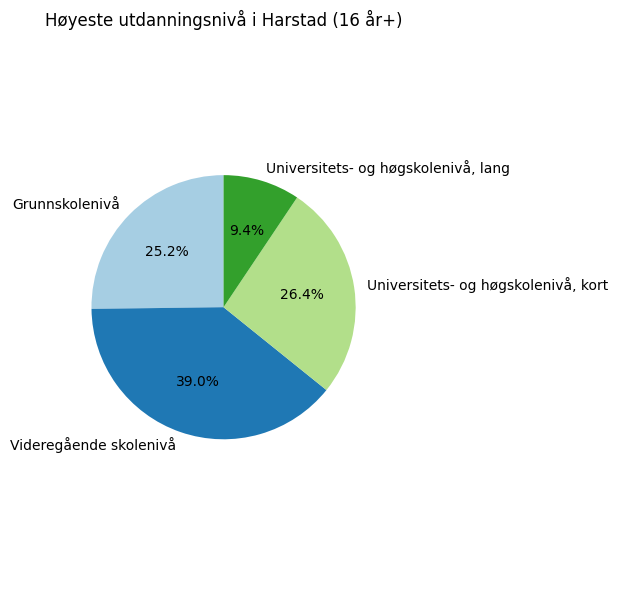

In [ ]:
import matplotlib.pyplot as plt

df_kake = df_utdanning[df_utdanning["Utdanningsnivå"] != "Uoppgitt eller ingen fullført utdanning"]

plt.figure(figsize=(6,6))
plt.pie(df_kake["Personer 16 år og over"],
        labels=df_kake["Utdanningsnivå"],
        autopct="%.1f%%",
        startangle=90,
        colors=plt.cm.Paired.colors)
plt.title("Høyeste utdanningsnivå i Harstad (16 år+)")
plt.axis("equal")
plt.tight_layout()
plt.show()


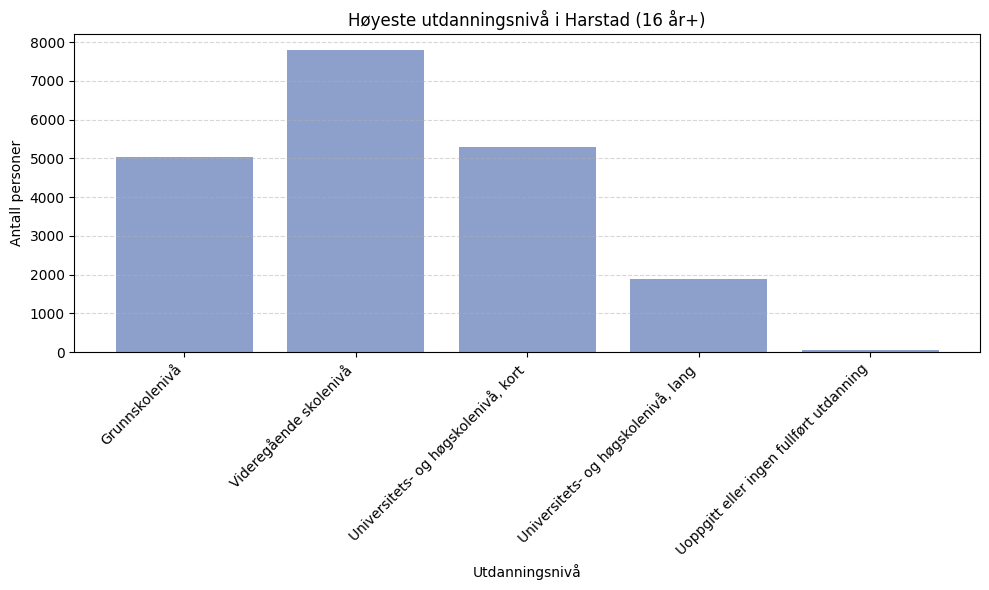

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(df_utdanning["Utdanningsnivå"], df_utdanning["Personer 16 år og over"], color="#8da0cb")
plt.title("Høyeste utdanningsnivå i Harstad (16 år+)")
plt.xlabel("Utdanningsnivå")
plt.ylabel("Antall personer")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


_______Oppgave 5 kulturmidler_______

In [ ]:
#Oppg 5
file_path_e = "/Users/paulindset/Desktop/Datavitenskap/hva-bruker-kommunen-kult.csv"
df_kultur = pd.read_csv(file_path_e, delimiter=";")

df_kultur.head()


,Tjenesteområde,2024
0,Aktivitetstilbud barn og unge,271
1,Bibliotek,262
2,Muséer,106
3,Idrett og tilskudd til andres idrettsanlegg,249
4,Kommunale idrettsbygg og idrettsanlegg,619


In [ ]:
total_kultur = df_kultur["2024"].sum()
print(f"Totalt kulturbudsjett i Harstad (2024): {total_kultur} millioner kroner")

Totalt kulturbudsjett i Harstad (2024): 1931 millioner kroner


In [35]:
idrettsbygg = df_kultur.loc[
    df_kultur["Tjenesteområde"] == "Kommunale idrettsbygg og idrettsanlegg", "2024"
].values[0]

andel = idrettsbygg / total_kultur * 100
print(f"Andel til kommunale idrettsbygg og anlegg: {andel:.1f}%")


Andel til kommunale idrettsbygg og anlegg: 32.1%


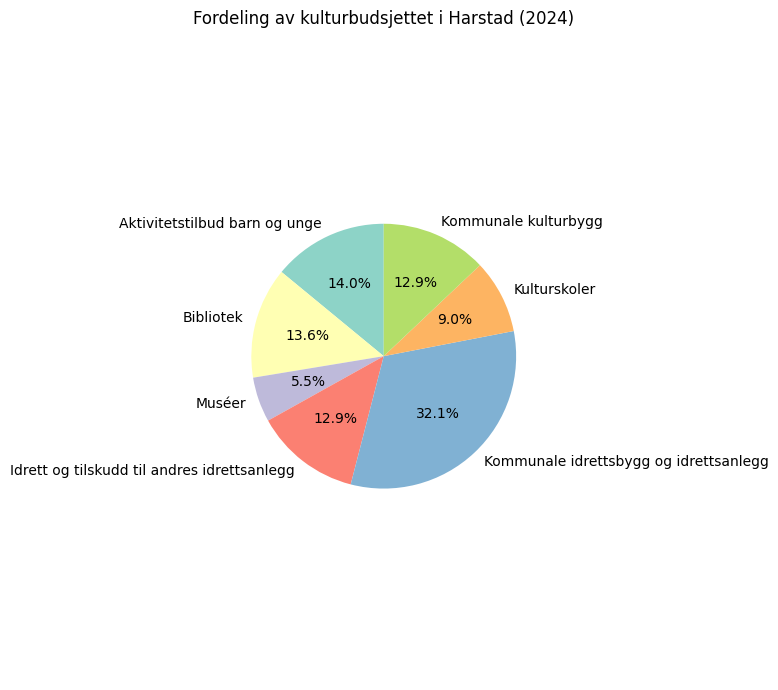

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.pie(df_kultur["2024"],
        labels=df_kultur["Tjenesteområde"],
        autopct="%.1f%%",
        startangle=90,
        colors=plt.cm.Set3.colors)
plt.title("Fordeling av kulturbudsjettet i Harstad (2024)")
plt.axis("equal")
plt.tight_layout()
plt.show()


_______Oppgave 6 kommunale utgifter_______

In [ ]:
# Oppg 6
file_path_f = "/Users/paulindset/Downloads/utgifter-etter-utvalgte.csv"
df_utgifter = pd.read_csv(file_path_f, delimiter=";")

df_utgifter.head()

,Tjenesteområde,2024
0,Sosialsektoren samlet,4.5
1,Barnevern,2.6
2,"Vann, avløp, renovasjon, avfall (VAR)",5.3
3,"Administrasjon, kommune",5.0
4,"Kultursektoren, kommune",3.0


In [ ]:
sum_oppgitt = df_utgifter["2024"].sum()
print(f"Summerte utgifter fra datagrunnlaget: {sum_oppgitt} millioner kroner")

Summerte utgifter fra datagrunnlaget: 82.5 millioner kroner


In [39]:
total_utgifter = 1170  # millioner kroner – eksempel
andel_utenfor = 100 - (sum_oppgitt / total_utgifter * 100)
print(f"Andel utgifter som ikke er med i datagrunnlaget: {andel_utenfor:.1f}%")

Andel utgifter som ikke er med i datagrunnlaget: 92.9%


_______Oppgave 7 Bil og hybrid_______

In [ ]:
#Oppg7
file_path_g = "/Users/paulindset/Desktop/Datavitenskap/typer-av-biler-i-kommune.csv"
df_biler = pd.read_csv(file_path_g, delimiter=";")

df_biler.head()

,Drivstoff,2024
0,Bensin,3392
1,Diesel,6231
2,El.,2653
3,Annet drivstoff,1266


In [41]:
totale_biler = df_biler["2024"].sum()
hybrid_antatt = df_biler.loc[df_biler["Drivstoff"] == "Annet drivstoff", "2024"].values[0]
andel_hybrid = hybrid_antatt / totale_biler * 100

print(f"Antall hybridbiler (antatt): {hybrid_antatt}")
print(f"Andel hybridbiler: {andel_hybrid:.1f}%")


Antall hybridbiler (antatt): 1266
Andel hybridbiler: 9.3%


In [ ]:
kjørbar_alder = gruppe_df.loc[gruppe_df["aldergruppe"].isin([
    "20-29", "30-39", "40-49", "50-59", "60-69", "70-79"
]), "value"].sum()

biler_per_person = totale_biler / kjørbar_alder
print(f"Antall biler per person i kjørbar alder: {biler_per_person:.2f}")


Antall biler per person i kjørbar alder: 0.74


_______Funksjon til Oppgave 8_______

In [43]:
#Oppg 8
import matplotlib.pyplot as plt

def lag_stolpediagram(df):
    """
    Tar inn en dataframe med to kolonner:
    - Første kolonne: kategorier
    - Andre kolonne: verdier
    Lager et stolpediagram basert på dette.
    """
    plt.figure(figsize=(8, 5))
    plt.bar(df.iloc[:, 0], df.iloc[:, 1], color="#4daf4a")
    plt.xlabel("Kategori")
    plt.ylabel("Verdi")
    plt.title("Stolpediagram fra funksjon")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


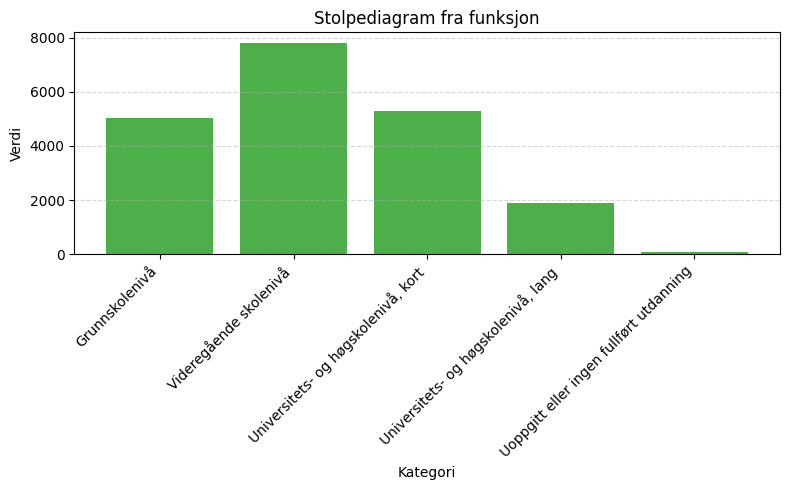

In [ ]:
lag_stolpediagram(df_utdanning[["Utdanningsnivå", "Personer 16 år og over"]])

Funksjonen viser et plott direkte på skjermen ved hjelp av `plt.show()`. Siden målet er å *visualisere*, ikke å beregne og returnere verdier, trenger man ikke `return`.

_________Oppgave9 Harstad sammenlinkna med Tromsø_________

In [ ]:
#Oppg 9
df_TA = pd.read_csv("/Users/paulindset/Desktop/Datavitenskap/Taldersfordeling-for-innb.csv", delimiter=";")
df_TJ = pd.read_csv("/Users/paulindset/Desktop/Datavitenskap/Thva-innbyggerne-jobber-m (1).csv", delimiter=";")
df_TU = pd.read_csv("/Users/paulindset/Desktop/Datavitenskap/Thyeste-fullfrte-utdannin (1).csv", delimiter=";")

df_TA.head(), df_TJ.head(), df_TU.head()


(      Alder  Kvinner  Menn
 0    0-4 år    -1899  1997
 1    5-9 år    -1936  1981
 2  10-14 år    -2042  2223
 3  15-19 år    -2218  2487
 4  20-24 år    -2759  2671,
                                               Næring   2020
 0                        Jordbruk, skogbruk og fiske    670
 1                                   Sekundærnæringer   5205
 2  Varehandel, hotell og restaurant, samferdsel, ...  15018
 3                Off.adm., forsvar, sosialforsikring   2729
 4                                       Undervisning   5362,
                             Utdanningsnivå  Personer 16 år og over
 0                           Grunnskolenivå                   13373
 1                   Videregående skolenivå                   19923
 2      Universitets- og høgskolenivå, kort                   17859
 3      Universitets- og høgskolenivå, lang                   12003
 4  Uoppgitt eller ingen fullført utdanning                     199)

_____Utdanningsnivå_____

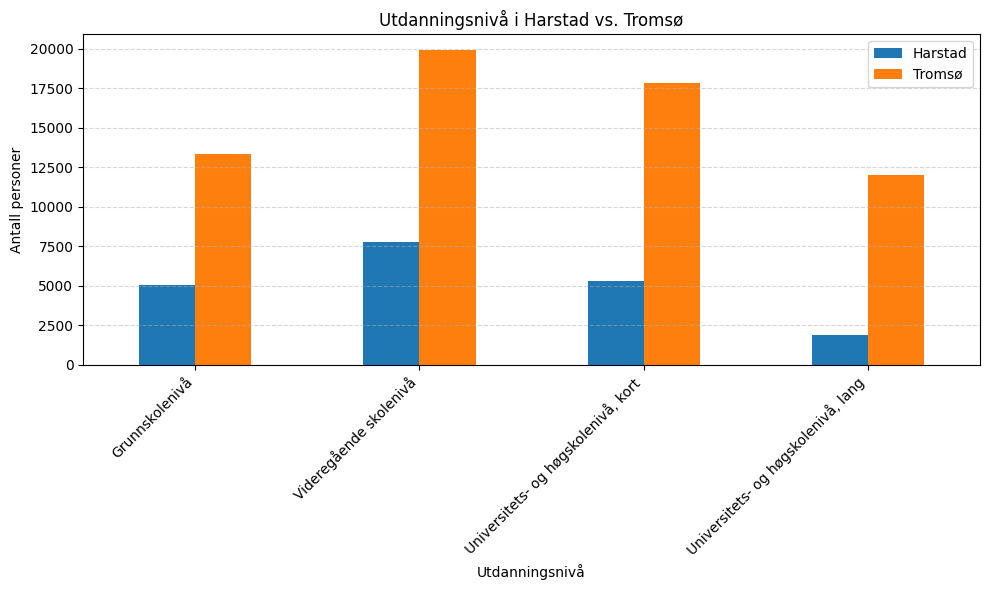

In [ ]:
harstad_utd = df_utdanning[df_utdanning["Utdanningsnivå"] != "Uoppgitt eller ingen fullført utdanning"]
tromso_utd = df_TU[df_TU["Utdanningsnivå"] != "Uoppgitt eller ingen fullført utdanning"]

sammenligning_utd = pd.DataFrame({
    "Utdanningsnivå": harstad_utd["Utdanningsnivå"],
    "Harstad": harstad_utd["Personer 16 år og over"].values,
    "Tromsø": tromso_utd["Personer 16 år og over"].values
})

sammenligning_utd.set_index("Utdanningsnivå").plot(kind="bar", figsize=(10,6))
plt.title("Utdanningsnivå i Harstad vs. Tromsø")
plt.ylabel("Antall personer")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

_____Offentlig vs privat sektor_____

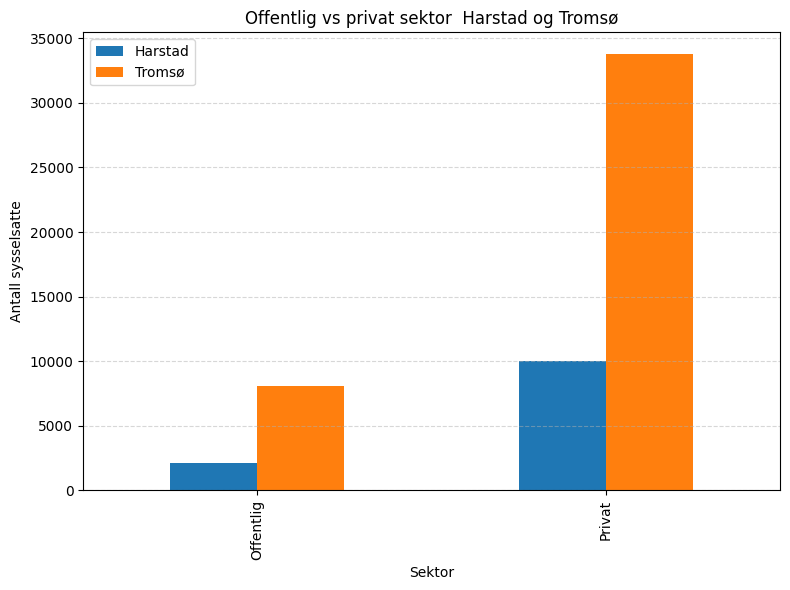

In [53]:
offentlig_kategorier = [
    "Undervisning",
    "Helse og sosialtjenester",
    "Off.adm., forsvar, sosialforsikring"
]

def sektorfordeling(df):
    offentlig = df[df["Næring"].isin(offentlig_kategorier)]["2020"].sum()
    privat = df[~df["Næring"].isin(offentlig_kategorier)]["2020"].sum()
    return offentlig, privat

off_harstad, priv_harstad = sektorfordeling(df_jobb)
off_tromso, priv_tromso = sektorfordeling(df_TJ)
sektor_df = pd.DataFrame({
    "Sektor": ["Offentlig", "Privat"],
    "Harstad": [off_harstad, priv_harstad],
    "Tromsø": [off_tromso, priv_tromso]
})

sektor_df.set_index("Sektor").plot(kind="bar", figsize=(8,6))
plt.title("Offentlig vs privat sektor  Harstad og Tromsø")
plt.ylabel("Antall sysselsatte")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


_____Andel i jobb   Harstad vs Tromsø_____

In [54]:
arbeidsfør_harstad = gruppe_df.loc[
    gruppe_df["aldergruppe"].isin(["20-29","30-39","40-49","50-59","60-69"]), "value"
].sum()
sysselsatte_harstad = df_jobb["2020"].sum()
andel_harstad = sysselsatte_harstad / arbeidsfør_harstad * 100

aldersgrupper_tromso = ["20-24 år", "25-29 år", "30-34 år", "35-39 år", "40-44 år", "45-49 år",
                        "50-54 år", "55-59 år", "60-64 år", "65-69 år"]
df_TA["Totalt"] = df_TA["Kvinner"].abs() + df_TA["Menn"]
arbeidsfør_tromso = df_TA[df_TA["Alder"].isin(aldersgrupper_tromso)]["Totalt"].sum()
sysselsatte_tromso = df_TJ["2020"].sum()
andel_tromso = sysselsatte_tromso / arbeidsfør_tromso * 100

print(f"Andel i jobb i Harstad: {andel_harstad:.1f}%")
print(f"Andel i jobb i Tromsø: {andel_tromso:.1f}%")


Andel i jobb i Harstad: 77.5%
Andel i jobb i Tromsø: 77.7%
